<a href="https://colab.research.google.com/github/Vamsiyadav-2000/Covid_cnn/blob/main/lung_diseases_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia

100% 2.05G/2.06G [00:21<00:00, 45.9MB/s]
100% 2.06G/2.06G [00:22<00:00, 100MB/s] 


In [ ]:
!kaggle datasets download -d tawsifurrahman/tuberculosis-tb-chest-xray-dataset

 99% 659M/663M [00:04<00:00, 176MB/s]
100% 663M/663M [00:04<00:00, 153MB/s]


In [ ]:
import os
import zipfile
local_zip = '/content/chest-xray-covid19-pneumonia.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/Datasets/chest-xray-covid19-pneumonia')
zip_ref.close()

In [ ]:
local_zip = '/content/tuberculosis-tb-chest-xray-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/Datasets/tuberculosis-tb-chest-xray-dataset')
zip_ref.close()

In [ ]:
import os
# Directory with our training pictures
train_COVID = os.path.join('/content/drive/MyDrive/Colab Notebooks/Datasets/chest-xray-covid19-pneumonia/Data/train/COVID19')
train_PNEUMONIA = os.path.join('/content/drive/MyDrive/Colab Notebooks/Datasets/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA')
train_TB = os.path.join('/content/drive/MyDrive/Colab Notebooks/Datasets/chest-xray-covid19-pneumonia/Data/train/TB')
train_Normal= os.path.join('/content/drive/MyDrive/Colab Notebooks/Datasets/chest-xray-covid19-pneumonia/Data/train/NORMAL')

In [ ]:
train_COVID_names = os.listdir(train_COVID)
print(train_COVID_names[:10])

train_Pneumonia_names = os.listdir(train_PNEUMONIA)
print(train_Pneumonia_names[:10])

train_TB_names = os.listdir(train_TB)
print(train_TB_names[:10])

train_Normal_names = os.listdir(train_Normal)
print(train_Normal_names[:10])

['COVID19(0).jpg', 'COVID19(1).jpg', 'COVID19(10).jpg', 'COVID19(100).jpg', 'COVID19(101).jpg', 'COVID19(102).jpg', 'COVID19(103).jpg', 'COVID19(104).jpg', 'COVID19(105).jpg', 'COVID19(106).jpg']
['PNEUMONIA(3174).jpg', 'PNEUMONIA(3175).jpg', 'PNEUMONIA(3176).jpg', 'PNEUMONIA(3177).jpg', 'PNEUMONIA(3178).jpg', 'PNEUMONIA(3179).jpg', 'PNEUMONIA(318).jpg', 'PNEUMONIA(3180).jpg', 'PNEUMONIA(3181).jpg', 'PNEUMONIA(3182).jpg']
['Tuberculosis-1.png', 'Tuberculosis-10.png', 'Tuberculosis-100.png', 'Tuberculosis-101.png', 'Tuberculosis-102.png', 'Tuberculosis-103.png', 'Tuberculosis-104.png', 'Tuberculosis-105.png', 'Tuberculosis-106.png', 'Tuberculosis-107.png']
['NORMAL(1237).jpg', 'NORMAL(1238).jpg', 'NORMAL(1239).jpg', 'NORMAL(124).jpg', 'NORMAL(1240).jpg', 'NORMAL(1241).jpg', 'NORMAL(1242).jpg', 'NORMAL(1243).jpg', 'NORMAL(1244).jpg', 'NORMAL(1245).jpg']


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 8
ncols = 4

pic_index = 0

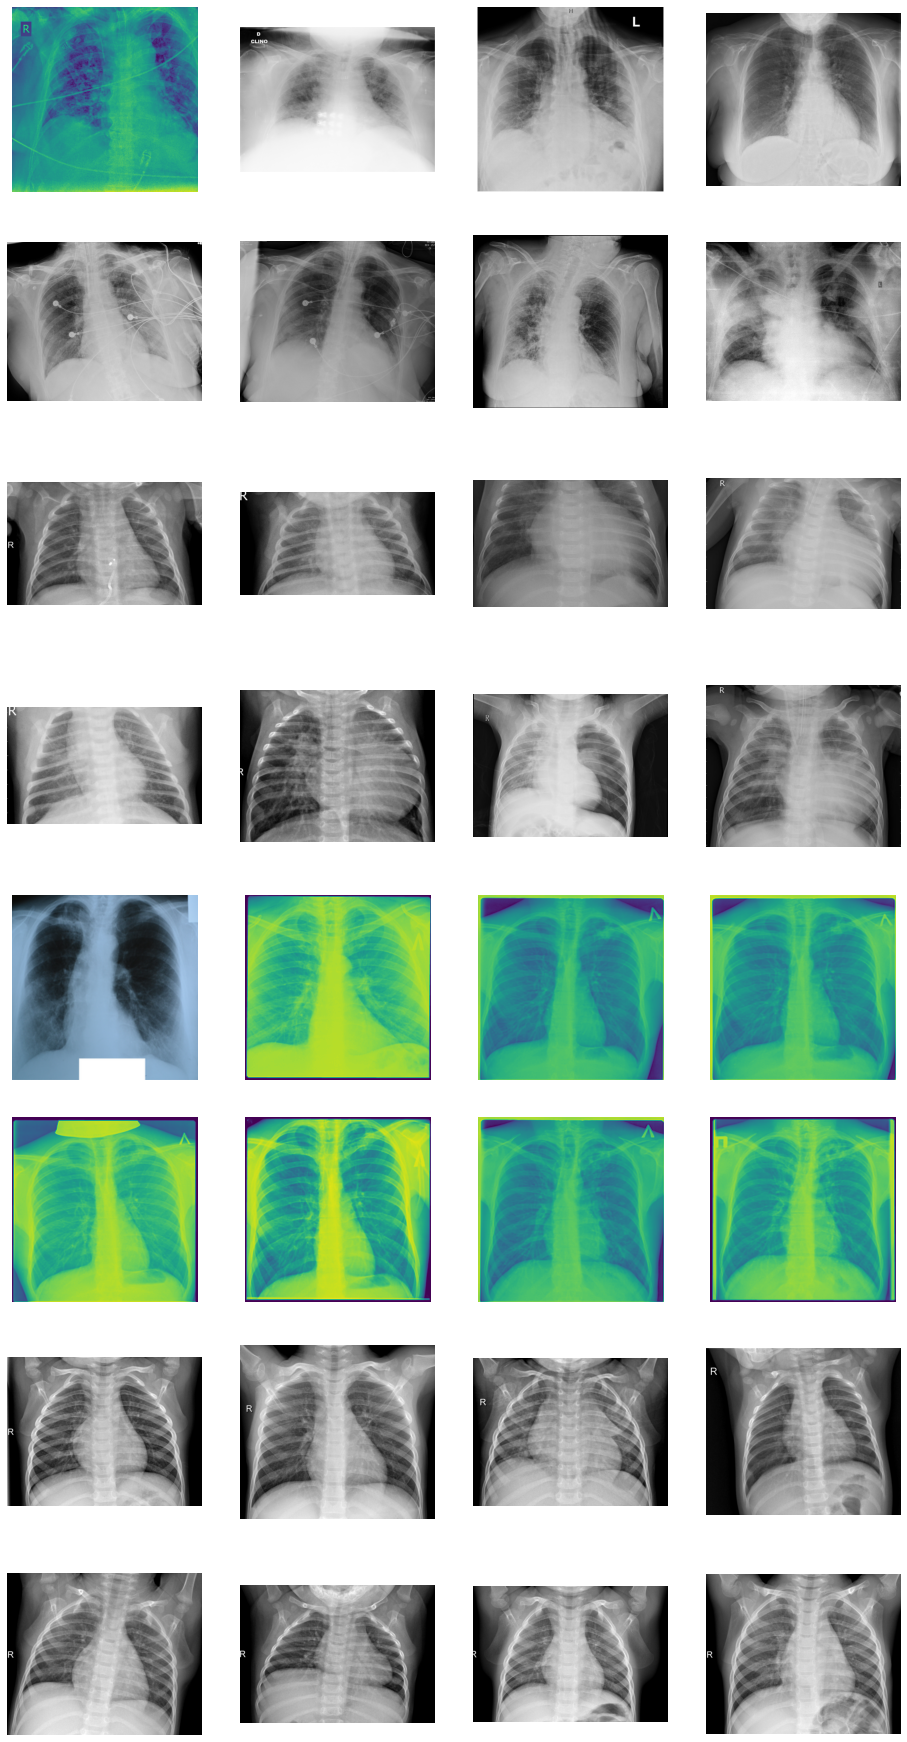

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_covid_pic = [os.path.join(train_COVID, fname) 
                for fname in train_COVID_names[pic_index-8:pic_index]]
next_pneumonia_pic = [os.path.join(train_PNEUMONIA, fname) 
                for fname in train_Pneumonia_names[pic_index-8:pic_index]]
next_tb_pic=[os.path.join(train_TB,fname) 
                for fname in train_TB_names[pic_index-8:pic_index]]
next_Normal_pic = [os.path.join(train_Normal, fname) 
                for fname in train_Normal_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_covid_pic+next_pneumonia_pic+next_tb_pic+next_Normal_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [ ]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       7

In [ ]:
import os
if not os.path.isdir('models'):
    os.mkdir('models')
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.05
        )

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Datasets/chest-xray-covid19-pneumonia/Data/train',
        target_size=(150,150),
        batch_size=256,
        class_mode='categorical',
        subset='training'
        )

Found 5411 images belonging to 4 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Datasets/chest-xray-covid19-pneumonia/Data/train',
        target_size=(150,150),
        batch_size=256,
        class_mode='categorical',
        subset='validation'
        )

Found 283 images belonging to 4 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Datasets/chest-xray-covid19-pneumonia/Data/test',
        target_size=(150,150),
        batch_size=256,
        class_mode='categorical')

Found 1438 images belonging to 4 classes.


In [ ]:
history = model.fit(train_generator,validation_data=val_generator,epochs=10)

Epoch 1/10
22/22 [==============================] - 1046s 47s/step - loss: 1.1752 - accuracy: 0.5457 - val_loss: 1.0511 - val_accuracy: 0.6007
Epoch 2/10
22/22 [==============================] - 171s 8s/step - loss: 0.8647 - accuracy: 0.6529 - val_loss: 0.7126 - val_accuracy: 0.7067
Epoch 3/10
22/22 [==============================] - 171s 8s/step - loss: 0.5209 - accuracy: 0.8006 - val_loss: 0.5513 - val_accuracy: 0.7915
Epoch 4/10
22/22 [==============================] - 168s 8s/step - loss: 0.4661 - accuracy: 0.8231 - val_loss: 0.5022 - val_accuracy: 0.7845
Epoch 5/10
22/22 [==============================] - 168s 8s/step - loss: 0.4060 - accuracy: 0.8492 - val_loss: 0.4156 - val_accuracy: 0.8198
Epoch 6/10
22/22 [==============================] - 170s 8s/step - loss: 0.4056 - accuracy: 0.8459 - val_loss: 0.4172 - val_accuracy: 0.8622
Epoch 7/10
22/22 [==============================] - 172s 8s/step - loss: 0.3772 - accuracy: 0.8597 - val_loss: 0.3718 - val_accuracy: 0.8587
Epoch 8/10


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/models/modelall.h5')

In [ ]:
model=load_model('/content/drive/MyDrive/Colab Notebooks/models/modelall.h5')

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.29517289996147156, 0.9109874963760376]

In [ ]:
import matplotlib.pyplot as plt
history=model
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

TypeError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


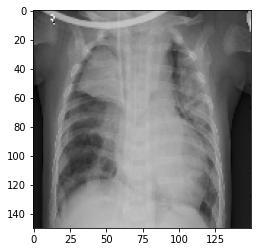

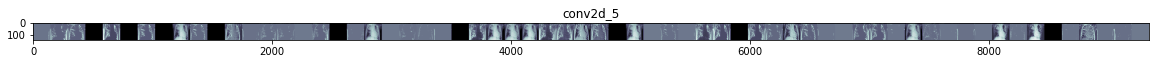

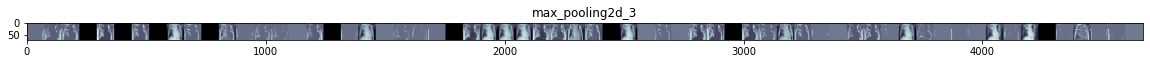

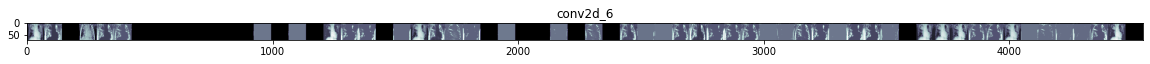

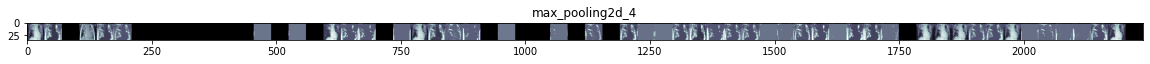

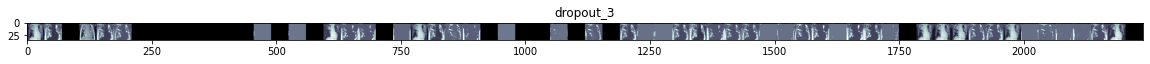

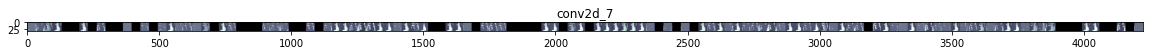

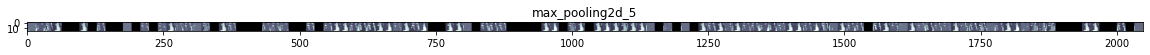

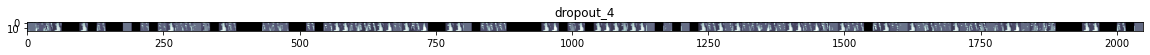

In [ ]:
 import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

covid_img_files = [os.path.join(train_COVID, f) for f in train_COVID_names]
normal_img_files = [os.path.join(train_Normal, f) for f in train_Normal_names]
pneumonia_img_files = [os.path.join(train_PNEUMONIA, f) for f in train_Pneumonia_names]
tb_img_files = [os.path.join(train_TB, f) for f in train_TB_names]
img_path = random.choice(covid_img_files+ normal_img_files+pneumonia_img_files+tb_img_files)

img = load_img(img_path, target_size=(150, 150))  
plt.imshow(img)
x = img_to_array(img)  
x = x.reshape((1,) + x.shape)  


x /= 255


successive_feature_maps = visualization_model.predict(x)


layer_names = [layer.name for layer in model.layers[1:]]


for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    
    n_features = feature_map.shape[-1]  
    
    size = feature_map.shape[1]
    
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      
      display_grid[:, i * size : (i + 1) * size] = x
    
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap='bone')